In [1]:
import configparser

config = configparser.ConfigParser()
config.read('/home/ec2-user/.aws/credentials')

['/home/ec2-user/.aws/credentials']

In [2]:
# AWS credentials and S3 settings
aws_access_key_id = config["default"]['aws_access_key_id']
aws_secret_access_key = config["default"]['aws_secret_access_key']
bucket_name = 'asl-capstone'
s3_URI = 's3://asl-capstone/'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import s3fs
fs = s3fs.S3FileSystem(key=aws_access_key_id, secret=aws_secret_access_key)


In [4]:
df = pd.read_parquet("s3://asl-capstone/youtube-asl/1000-samples/parsed/master_parquet.parquet")

In [5]:
df['frame_count'] = df['end_frame'] - df['start_frame']

In [6]:
df.frame_count.describe()

count    62260.000000
mean       136.556264
std        130.458035
min          0.000000
25%         69.000000
50%        109.000000
75%        173.000000
max      18611.000000
Name: frame_count, dtype: float64

In [7]:
df.frame_count.quantile(0.95)

323.0

Text(0.5, 1.0, 'Histogram of Caption Frame Counts for Youtube-ASL')

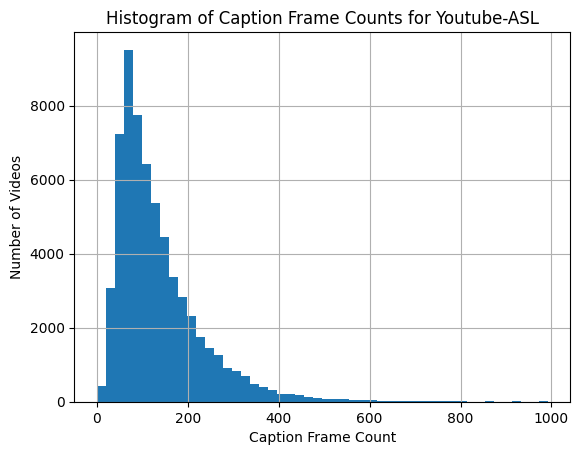

In [8]:

df[df.frame_count < 1000].frame_count.hist(bins=50)
plt.xlabel('Caption Frame Count')
plt.ylabel("Number of Videos")
plt.title('Histogram of Caption Frame Counts for Youtube-ASL')

<Axes: >

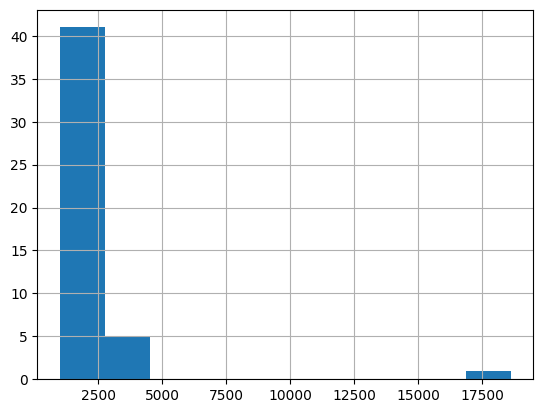

In [9]:
df[df.frame_count >= 1000].frame_count.hist()

# Evaluation of T5-Movinet Word Translations

In [17]:
ep15_04 = pd.read_parquet("s3://asl-capstone/t5_movinet_epoch15_1204.parquet")
ep15_04.shape

(5095, 2)

In [18]:
# from sentence_transformers import SentenceTransformer, util

# st_sim = SentenceTransformer('all-mpnet-base-v2',device="cpu")
# # Create SentenceTransformer embeddings from words
# st_preds = st_sim.encode(ep15_04['prediction'])
# st_labels = st_sim.encode(ep15_04['caption'])

# # Calculate cosine similarity
# cos_sim = []
# for p, l in zip(st_preds, st_labels):
#     cos_sim.append(float(util.cos_sim(p, l)))


# ep15_04['cos_sim'] = cos_sim
# print(ep15_04.cos_sim.mean())
# print(ep15_04.cos_sim.median())

0.6464475910682908
0.9999999403953552


In [19]:
# import nltk

# edit_distance = lambda x: nltk.edit_distance(x['prediction'], x['caption'])

# ep15_04['edit_distance'] = ep15_04.apply(edit_distance, axis=1)
# ep15_04.to_parquet("s3://asl-capstone/t5_movinet_epoch15_1204.parquet")


In [30]:
ep15_04[(ep15_04.cos_sim < 0.5)].drop_duplicates(['caption','prediction']
                                                 ).sort_values('cos_sim',ascending=False)[50:100]

,caption,prediction,cos_sim,edit_distance
4587,pants,diaper,0.447655,5
2140,j,v,0.443297,1
4395,possible,able,0.442978,5
923,able,possible,0.442978,5
2292,hamburger,kitchen,0.442005,8
450,italy,califor,0.439380,6
3930,bird,pig,0.438976,3
3001,today,midnight,0.438729,7
4954,pencil,knife,0.438389,5
732,peace,silent,0.438126,6


In [27]:
ep15_04[(ep15_04.cos_sim < 0.999) & (ep15_04.cos_sim > 0.5)].drop_duplicates(['caption','prediction']
                                                                            ).sort_values('cos_sim',ascending=True).head(50)

,caption,prediction,cos_sim,edit_distance
1119,sing,song,0.500701,1
177,strawberry,pepper,0.504203,8
2652,themselves,their,0.504629,7
3264,machine,engine,0.506398,4
4407,east,asia,0.508791,3
1808,butter,gum,0.510075,5
3968,similar,like,0.510209,6
1722,street,outside,0.510986,6
602,jacket,necklace,0.512006,6
1863,cat,tiger,0.513277,5


In [85]:
ep15_04[ep15_04.edit_distance == 2]

,caption,prediction,cos_sim,edit_distance
65,one,n,0.302453,2
97,more,movie,0.187893,2
222,mother,father,0.755923,2
289,doll,wolf,0.296586,2
378,you,no,0.242815,2
485,scot,spit,0.125239,2
539,eye,ear,0.621976,2
551,v,eg,0.294587,2
583,wind,window,0.413168,2
615,card,cake,0.240853,2


In [106]:
ep15_04.describe()

,cos_sim,edit_distance
count,5095.000000,5095.000000
mean,0.646448,2.715996
std,0.381792,3.119340
min,0.021876,0.000000
25%,0.225199,0.000000
50%,1.000000,0.000000
75%,1.000000,5.000000
max,1.000000,13.000000


In [107]:
ep15_04.cos_sim.quantile(0.4)

0.3516682624816895

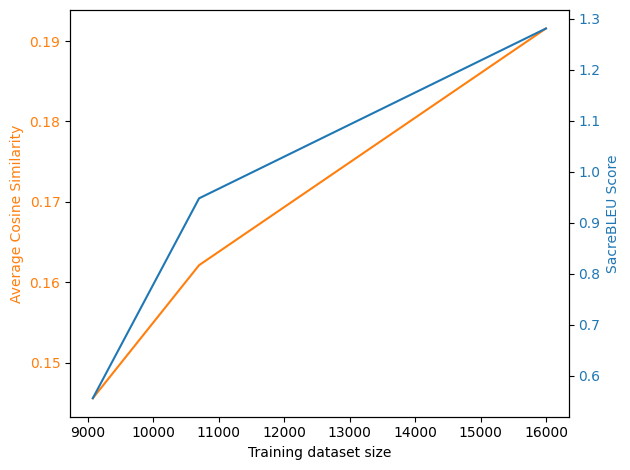

In [37]:
data_size = [9080, 10702, 15996]
sb = [0.5559911818139627, 0.9477871726519478, 1.280686047413783]
cs = [0.14556280111952166, 0.1621186593375244, 0.19157156346736579]

fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Training dataset size')
ax1.set_ylabel('Average Cosine Similarity', color=color)
ax1.plot(data_size, cs, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('SacreBLEU Score', color=color)  # we already handled the x-label with ax1
ax2.plot(data_size, sb, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()